In [1]:
import os
import random
import shutil
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

from torchvision import datasets, transforms

In [2]:
dataset_path = r"C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman\XR_Bones"
new_dataset_path = r"C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman\XR_Bones_new"
os.makedirs(new_dataset_path, exist_ok=True)

In [3]:
import os
import shutil

src_root = r"C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman\XR_Bones\YOLODataSet\images"
dst_root = r"C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman\XR_Bones_classification"
splits = ["train", "val"]

for split in splits:
    src_dir = os.path.join(src_root, split)
    dst_neg = os.path.join(dst_root, split, "negative")
    dst_pos = os.path.join(dst_root, split, "positive")
    os.makedirs(dst_neg, exist_ok=True)
    os.makedirs(dst_pos, exist_ok=True)

    for file in os.listdir(src_dir):
        if not file.lower().endswith((".jpg", ".jpeg", ".png")):
            continue

        src_path = os.path.join(src_dir, file)

        if "positive" in file.lower():
            dst_path = os.path.join(dst_pos, file)
        elif "negative" in file.lower():
            dst_path = os.path.join(dst_neg, file)
        else:
            continue

        shutil.copy(src_path, dst_path)
    print(f"Skopiowano {split} → {dst_root}")


Skopiowano train → C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman\XR_Bones_classification
Skopiowano val → C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman\XR_Bones_classification


In [4]:
import os

base_path = r"C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman\XR_Bones_classification"

for split in ["train", "val"]:
    for cls in ["positive", "negative"]:
        folder = os.path.join(base_path, split, cls)
        print(f"{split}/{cls}: {len(os.listdir(folder))} zdjęć")


train/positive: 9262 zdjęć
train/negative: 14589 zdjęć
val/positive: 500 zdjęć
val/negative: 500 zdjęć


In [5]:
import os
import shutil


src_root = r"C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman\XR_Bones\YOLODataSet\images"
categories = ["ELBOW", "SHOULDER", "HAND", "FOREARM", "FINGER"]
splits = ["train", "val"]

for category in categories:
    dst_root = fr"C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman\XR_{category}_classification"

    if os.path.exists(dst_root):
        shutil.rmtree(dst_root)
    for split in splits:
        os.makedirs(os.path.join(dst_root, split, "positive"), exist_ok=True)
        os.makedirs(os.path.join(dst_root, split, "negative"), exist_ok=True)

    for split in splits:
        src_dir = os.path.join(src_root, split)
        copied = 0
        for file in os.listdir(src_dir):
            name = file.lower()
            if not name.endswith((".jpg", ".jpeg", ".png")):
                continue
            if category.lower() not in name:
                continue

            src_path = os.path.join(src_dir, file)
            if "positive" in name:
                dst_path = os.path.join(dst_root, split, "positive", file)
            elif "negative" in name:
                dst_path = os.path.join(dst_root, split, "negative", file)
            else:
                continue

            shutil.copy(src_path, dst_path)
            copied += 1

        print(f"Skopiowano {copied} plików dla {category} ({split})")

    print(f"Zbiór danych dla {category} zapisany w:\n{dst_root}\n")
print("Wszystkie zbiory zostały utworzone.")


Skopiowano 4613 plików dla ELBOW (train)
Skopiowano 200 plików dla ELBOW (val)
Zbiór danych dla ELBOW zapisany w:
C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman\XR_ELBOW_classification

Skopiowano 7797 plików dla SHOULDER (train)
Skopiowano 200 plików dla SHOULDER (val)
Zbiór danych dla SHOULDER zapisany w:
C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman\XR_SHOULDER_classification

Skopiowano 5137 plików dla HAND (train)
Skopiowano 200 plików dla HAND (val)
Zbiór danych dla HAND zapisany w:
C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman\XR_HAND_classification

Skopiowano 1600 plików dla FOREARM (train)
Skopiowano 200 plików dla FOREARM (val)
Zbiór danych dla FOREARM zapisany w:
C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman\XR_FOREARM_classification

Skopiowano 4704 plików dla FINGER (train)
Skopiowano 200 plików dla FINGER (val)
Zbiór danych dla FINGER zapisany w:
C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zla

In [6]:
import os
import random
import shutil
from glob import glob


dataset_path = r"C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman\XR_ELBOW_classification"

seed = 42
test_fraction = 0.30  
source_split = "val"       
move_files = True         

random.seed(seed)


splits = ["train", "val", "test"]
classes = ["positive", "negative"]
for split in splits:
    for cls in classes:
        os.makedirs(os.path.join(dataset_path, split, cls), exist_ok=True)

def pick_files(dirpath):
    exts = ("*.jpg", "*.jpeg", "*.png")
    files = []
    for e in exts:
        files.extend(glob(os.path.join(dirpath, e)))
    return files

moved_total = 0
report = []

for cls in classes:
    src_dir = os.path.join(dataset_path, source_split, cls)
    dst_dir = os.path.join(dataset_path, "test", cls)

    files = pick_files(src_dir)
    n_src = len(files)
    if n_src == 0:
        report.append(f"[{cls}] Brak plików w {src_dir} — pomijam.")
        continue

    n_take = max(1, int(round(n_src * test_fraction))) if n_src > 3 else 1
    sample = random.sample(files, n_take)

    for f in sample:
        if move_files:
            shutil.move(f, os.path.join(dst_dir, os.path.basename(f)))
        else:
            shutil.copy2(f, os.path.join(dst_dir, os.path.basename(f)))
    moved_total += len(sample)


    n_src_after = len(pick_files(src_dir))
    n_test_now = len(pick_files(dst_dir))
    report.append(
        f"[{cls}] przeniesiono {len(sample)} z {n_src} → "
        f"{source_split} zostało {n_src_after}, test ma teraz {n_test_now}"
    )


for line in report:
    print(line)
print(f"\nRazem przeniesionych do TEST: {moved_total}")

print("\nŚcieżki:")
print(f"train: {os.path.join(dataset_path, 'train')}")
print(f"val  : {os.path.join(dataset_path, 'val')}")
print(f"test : {os.path.join(dataset_path, 'test')}")



[positive] przeniesiono 30 z 100 → val zostało 70, test ma teraz 30
[negative] przeniesiono 30 z 100 → val zostało 70, test ma teraz 30

Razem przeniesionych do TEST: 60

Ścieżki:
train: C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman\XR_ELBOW_classification\train
val  : C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman\XR_ELBOW_classification\val
test : C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman\XR_ELBOW_classification\test


Device: cuda
Dataset path: C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman\XR_ELBOW_classification
Klasy: ['negative', 'positive']
train: 4613 obrazów
  val: 140 obrazów
 test: 60 obrazów
train distribution: Counter({0: 2764, 1: 1849})
val distribution: Counter({0: 70, 1: 70})
test distribution: Counter({0: 30, 1: 30})
───────────────────────────────
Wagi klas: [1.668958067893982, 2.4948620796203613]

Epoch 1/25


Train:   0%|          | 0/289 [00:00<?, ?it/s]C:\Users\Weronika\AppData\Local\Temp\ipykernel_17120\2421757163.py:156: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\Scalar.cpp:23.)
  run_loss += loss.item() * inputs.size(0)


Train: acc=0.751, loss=0.545 | Val: acc=0.764, loss=0.499 | Test: acc=0.800, loss=0.413

Epoch 2/25


Train: acc=0.804, loss=0.459 | Val: acc=0.821, loss=0.462 | Test: acc=0.833, loss=0.412

Epoch 3/25


Train: acc=0.830, loss=0.408 | Val: acc=0.736, loss=0.507 | Test: acc=0.850, loss=0.452

Epoch 4/25


Train: acc=0.844, loss=0.378 | Val: acc=0.829, loss=0.445 | Test: acc=0.867, loss=0.353

Epoch 5/25


Train: acc=0.858, loss=0.361 | Val: acc=0.786, loss=0.472 | Test: acc=0.850, loss=0.351

Epoch 6/25


Train: acc=0.896, loss=0.265 | Val: acc=0.793, loss=0.489 | Test: acc=0.867, loss=0.336

Epoch 7/25


Train: acc=0.911, loss=0.229 | Val: acc=0.814, loss=0.523 | Test: acc=0.833, loss=0.346

Epoch 8/25


Train: acc=0.919, loss=0.217 | Val: acc=0.807, loss=0.566 | Test: acc=0.900, loss=0.317

Epoch 9/25


Train: acc=0.927, loss=0.195 | Val: acc=0.814, loss=0.555 | Test: acc=0.833, loss=0.384

Epoch 10/25


Train: acc=0.929, loss=0.177 | Val: acc=0.786, loss=0.624 | Test: acc=0.833, loss=0.394

Epoch 11/25


Train: acc=0.944, loss=0.155 | Val: acc=0.800, loss=0.627 | Test: acc=0.850, loss=0.367

Epoch 12/25


Train: acc=0.946, loss=0.159 | Val: acc=0.807, loss=0.622 | Test: acc=0.850, loss=0.370

Epoch 13/25


Train: acc=0.948, loss=0.153 | Val: acc=0.807, loss=0.629 | Test: acc=0.850, loss=0.375

Epoch 14/25


Train: acc=0.946, loss=0.152 | Val: acc=0.800, loss=0.629 | Test: acc=0.850, loss=0.369

Epoch 15/25


Train: acc=0.941, loss=0.155 | Val: acc=0.800, loss=0.638 | Test: acc=0.850, loss=0.375

Epoch 16/25


Train: acc=0.947, loss=0.150 | Val: acc=0.800, loss=0.638 | Test: acc=0.850, loss=0.374

Epoch 17/25


Train: acc=0.949, loss=0.146 | Val: acc=0.807, loss=0.639 | Test: acc=0.850, loss=0.373

Epoch 18/25


Train: acc=0.947, loss=0.147 | Val: acc=0.800, loss=0.640 | Test: acc=0.850, loss=0.371

Epoch 19/25


Train: acc=0.945, loss=0.150 | Val: acc=0.807, loss=0.640 | Test: acc=0.850, loss=0.372

Epoch 20/25


Train: acc=0.945, loss=0.145 | Val: acc=0.800, loss=0.641 | Test: acc=0.850, loss=0.372

Epoch 21/25


Train: acc=0.944, loss=0.156 | Val: acc=0.800, loss=0.641 | Test: acc=0.850, loss=0.372

Epoch 22/25


Train: acc=0.946, loss=0.147 | Val: acc=0.800, loss=0.641 | Test: acc=0.850, loss=0.372

Epoch 23/25


Train: acc=0.947, loss=0.146 | Val: acc=0.800, loss=0.641 | Test: acc=0.850, loss=0.372

Epoch 24/25


Train: acc=0.948, loss=0.144 | Val: acc=0.800, loss=0.641 | Test: acc=0.850, loss=0.372

Epoch 25/25


Train: acc=0.943, loss=0.155 | Val: acc=0.800, loss=0.641 | Test: acc=0.850, loss=0.372


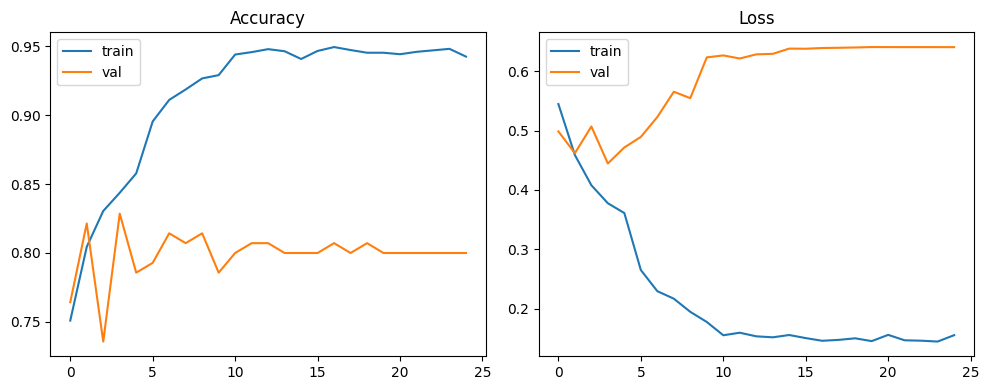

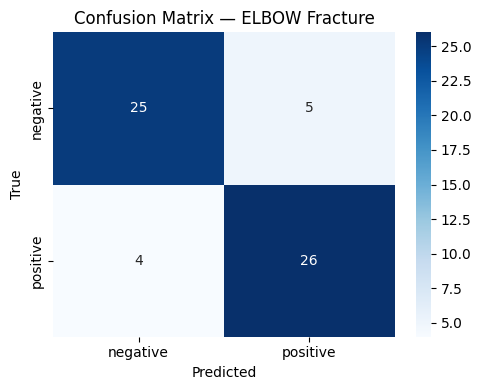


Classification report:

              precision    recall  f1-score   support

    negative       0.86      0.83      0.85        30
    positive       0.84      0.87      0.85        30

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



In [ ]:
import os
import random
from collections import Counter

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


base_root = r"C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman"
category  = "ELBOW" 
dataset_path = os.path.join(base_root, f"XR_{category}_classification")

image_size   = 224
batch_size   = 16
num_workers  = 2
epochs       = 25
lr           = 1e-4
seed         = 27

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)
print("Dataset path:", dataset_path)


random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)


data_transforms = {
    "train": transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.CenterCrop(image_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    "val": transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.CenterCrop(image_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    "test": transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.CenterCrop(image_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
}


splits = ["train", "val", "test"]

image_datasets = {
    split: datasets.ImageFolder(os.path.join(dataset_path, split),
                                transform=data_transforms[split])
    for split in splits
}

dataloaders = {
    split: DataLoader(image_datasets[split],
                      batch_size=batch_size,
                      shuffle=(split == "train"),
                      num_workers=num_workers)
    for split in splits
}

class_names = image_datasets["train"].classes
print("Klasy:", class_names)
for split in splits:
    print(f"{split:>5}: {len(image_datasets[split])} obrazów")


for split in splits:
    cnt = Counter([label for _, label in image_datasets[split]])
    print(f"{split} distribution:", cnt)
print("───────────────────────────────")


model = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1)

for param in model.features[:20].parameters():   
    param.requires_grad = False


in_features = model.classifier[-1].in_features
model.classifier[-1] = nn.Linear(in_features, len(class_names))
model = model.to(device)

train_labels = [label for _, label in image_datasets["train"]]
counts = Counter(train_labels)
total = sum(counts.values())
class_weights = torch.tensor(
    [total / counts[i] for i in range(len(class_names))],
    dtype=torch.float32
).to(device)
print("Wagi klas:", class_weights.tolist())

criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.AdamW(model.parameters(), lr=lr)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)


history = {
    "train_acc": [], "train_loss": [],
    "val_acc":   [], "val_loss":   [],
    "test_acc":  [], "test_loss":  [],
}

for epoch in range(1, epochs + 1):
    print(f"\nEpoch {epoch}/{epochs}")

 
    model.train()
    run_loss, correct, total = 0.0, 0, 0
    for inputs, labels in tqdm(dataloaders["train"], desc="Train", leave=False):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        run_loss += loss.item() * inputs.size(0)
        correct += torch.sum(preds == labels).item()
        total += labels.size(0)

    train_loss = run_loss / total
    train_acc = correct / total


    model.eval()
    run_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for inputs, labels in tqdm(dataloaders["val"], desc="Val", leave=False):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            _, preds = torch.max(outputs, 1)
            run_loss += loss.item() * inputs.size(0)
            correct += torch.sum(preds == labels).item()
            total += labels.size(0)

    val_loss = run_loss / total
    val_acc = correct / total

    run_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for inputs, labels in tqdm(dataloaders["test"], desc="Test", leave=False):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            _, preds = torch.max(outputs, 1)
            run_loss += loss.item() * inputs.size(0)
            correct += torch.sum(preds == labels).item()
            total += labels.size(0)

    test_loss = run_loss / total
    test_acc = correct / total

    scheduler.step()

    history["train_acc"].append(train_acc)
    history["train_loss"].append(train_loss)
    history["val_acc"].append(val_acc)
    history["val_loss"].append(val_loss)
    history["test_acc"].append(test_acc)
    history["test_loss"].append(test_loss)

    print(f"Train: acc={train_acc:.3f}, loss={train_loss:.3f} | "
          f"Val: acc={val_acc:.3f}, loss={val_loss:.3f} | "
          f"Test: acc={test_acc:.3f}, loss={test_loss:.3f}")


plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history["train_acc"], label="train")
plt.plot(history["val_acc"], label="val")
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history["train_loss"], label="train")
plt.plot(history["val_loss"], label="val")
plt.title("Loss")
plt.legend()
plt.tight_layout()
plt.show()


y_true, y_pred = [], []
model.eval()
with torch.no_grad():
    for inputs, labels in dataloaders["test"]:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title(f"Confusion Matrix — {category} Fracture")
plt.tight_layout()
plt.show()

print("\nClassification report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))


In [7]:
import os
import random
import shutil
from glob import glob


dataset_path = r"C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman\XR_SHOULDER_classification"


seed = 42
test_fraction = 0.30       
source_split = "val"       
move_files = True          

random.seed(seed)

splits = ["train", "val", "test"]
classes = ["positive", "negative"]
for split in splits:
    for cls in classes:
        os.makedirs(os.path.join(dataset_path, split, cls), exist_ok=True)

def pick_files(dirpath):
    exts = ("*.jpg", "*.jpeg", "*.png")
    files = []
    for e in exts:
        files.extend(glob(os.path.join(dirpath, e)))
    return files

moved_total = 0
report = []

for cls in classes:
    src_dir = os.path.join(dataset_path, source_split, cls)
    dst_dir = os.path.join(dataset_path, "test", cls)

    files = pick_files(src_dir)
    n_src = len(files)
    if n_src == 0:
        report.append(f"[{cls}] Brak plików w {src_dir} — pomijam.")
        continue

    n_take = max(1, int(round(n_src * test_fraction))) if n_src > 3 else 1
    sample = random.sample(files, n_take)

    for f in sample:
        if move_files:
            shutil.move(f, os.path.join(dst_dir, os.path.basename(f)))
        else:
            shutil.copy2(f, os.path.join(dst_dir, os.path.basename(f)))
    moved_total += len(sample)


    n_src_after = len(pick_files(src_dir))
    n_test_now = len(pick_files(dst_dir))
    report.append(
        f"[{cls}] przeniesiono {len(sample)} z {n_src} → "
        f"{source_split} zostało {n_src_after}, test ma teraz {n_test_now}"
    )


for line in report:
    print(line)
print(f"\nRazem przeniesionych do TEST: {moved_total}")

print("\nŚcieżki:")
print(f"train: {os.path.join(dataset_path, 'train')}")
print(f"val  : {os.path.join(dataset_path, 'val')}")
print(f"test : {os.path.join(dataset_path, 'test')}")



[positive] przeniesiono 30 z 100 → val zostało 70, test ma teraz 30
[negative] przeniesiono 30 z 100 → val zostało 70, test ma teraz 30

Razem przeniesionych do TEST: 60

Ścieżki:
train: C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman\XR_SHOULDER_classification\train
val  : C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman\XR_SHOULDER_classification\val
test : C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman\XR_SHOULDER_classification\test


Device: cuda
Dataset path: C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman\XR_SHOULDER_classification
Klasy: ['negative', 'positive']
train: 7797 obrazów
  val: 140 obrazów
 test: 60 obrazów
train distribution: Counter({0: 4000, 1: 3797})
val distribution: Counter({0: 70, 1: 70})
test distribution: Counter({0: 30, 1: 30})
───────────────────────────────
Wagi klas: [1.9492499828338623, 2.0534632205963135]

Epoch 1/25


Train:   0%|          | 0/488 [00:00<?, ?it/s]C:\Users\Weronika\AppData\Local\Temp\ipykernel_6900\2141037823.py:141: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\Scalar.cpp:23.)
  run_loss += loss.item() * inputs.size(0)


Train: acc=0.545, loss=0.692 | Val: acc=0.479, loss=0.693 | Test: acc=0.500, loss=0.697

Epoch 2/25


Train: acc=0.555, loss=0.680 | Val: acc=0.543, loss=0.702 | Test: acc=0.600, loss=0.698

Epoch 3/25


Train: acc=0.688, loss=0.602 | Val: acc=0.614, loss=0.756 | Test: acc=0.583, loss=0.873

Epoch 4/25


Train: acc=0.730, loss=0.554 | Val: acc=0.636, loss=0.666 | Test: acc=0.650, loss=0.684

Epoch 5/25


Train: acc=0.762, loss=0.517 | Val: acc=0.714, loss=0.543 | Test: acc=0.733, loss=0.612

Epoch 6/25


Train: acc=0.799, loss=0.456 | Val: acc=0.729, loss=0.549 | Test: acc=0.717, loss=0.586

Epoch 7/25


Train: acc=0.809, loss=0.433 | Val: acc=0.743, loss=0.540 | Test: acc=0.700, loss=0.588

Epoch 8/25


Train: acc=0.811, loss=0.423 | Val: acc=0.743, loss=0.516 | Test: acc=0.750, loss=0.543

Epoch 9/25


Train: acc=0.820, loss=0.411 | Val: acc=0.729, loss=0.528 | Test: acc=0.717, loss=0.561

Epoch 10/25


Train: acc=0.826, loss=0.399 | Val: acc=0.750, loss=0.536 | Test: acc=0.717, loss=0.555

Epoch 11/25


Train: acc=0.837, loss=0.384 | Val: acc=0.757, loss=0.525 | Test: acc=0.717, loss=0.544

Epoch 12/25


Train: acc=0.836, loss=0.382 | Val: acc=0.757, loss=0.521 | Test: acc=0.733, loss=0.537

Epoch 13/25


Train: acc=0.834, loss=0.382 | Val: acc=0.757, loss=0.519 | Test: acc=0.717, loss=0.534

Epoch 14/25


Train: acc=0.840, loss=0.380 | Val: acc=0.757, loss=0.522 | Test: acc=0.733, loss=0.535

Epoch 15/25


Train: acc=0.840, loss=0.376 | Val: acc=0.757, loss=0.519 | Test: acc=0.733, loss=0.532

Epoch 16/25


Train: acc=0.835, loss=0.375 | Val: acc=0.757, loss=0.519 | Test: acc=0.733, loss=0.532

Epoch 17/25


Train: acc=0.843, loss=0.372 | Val: acc=0.757, loss=0.519 | Test: acc=0.733, loss=0.531

Epoch 18/25


Train: acc=0.843, loss=0.369 | Val: acc=0.757, loss=0.518 | Test: acc=0.733, loss=0.531

Epoch 19/25


Train: acc=0.840, loss=0.375 | Val: acc=0.757, loss=0.518 | Test: acc=0.733, loss=0.531

Epoch 20/25


Train: acc=0.840, loss=0.375 | Val: acc=0.757, loss=0.519 | Test: acc=0.733, loss=0.530

Epoch 21/25


Train: acc=0.839, loss=0.375 | Val: acc=0.757, loss=0.519 | Test: acc=0.733, loss=0.530

Epoch 22/25


Train: acc=0.841, loss=0.372 | Val: acc=0.757, loss=0.519 | Test: acc=0.733, loss=0.530

Epoch 23/25


Train: acc=0.839, loss=0.375 | Val: acc=0.757, loss=0.519 | Test: acc=0.733, loss=0.530

Epoch 24/25


Train: acc=0.837, loss=0.374 | Val: acc=0.757, loss=0.519 | Test: acc=0.733, loss=0.530

Epoch 25/25


Train: acc=0.840, loss=0.372 | Val: acc=0.757, loss=0.519 | Test: acc=0.733, loss=0.530


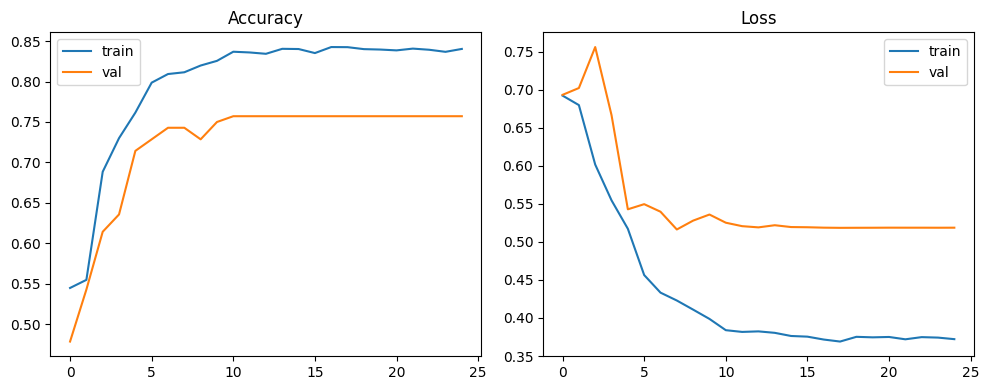

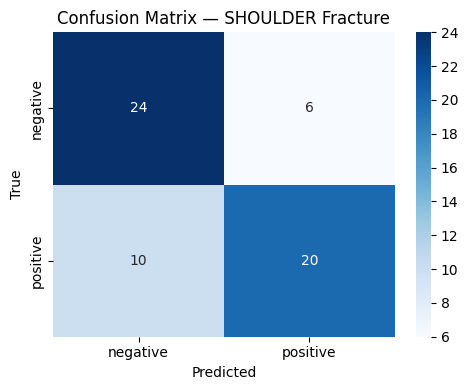


Classification report:

              precision    recall  f1-score   support

    negative       0.71      0.80      0.75        30
    positive       0.77      0.67      0.71        30

    accuracy                           0.73        60
   macro avg       0.74      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60



In [1]:
import os
import random
from collections import Counter

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


base_root = r"C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman"
category  = "SHOULDER"  
dataset_path = os.path.join(base_root, f"XR_{category}_classification")

image_size   = 224
batch_size   = 16
num_workers  = 2
epochs       = 25
lr           = 1e-4
seed         = 27

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)
print("Dataset path:", dataset_path)


random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)

data_transforms = {
    "train": transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.CenterCrop(image_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    "val": transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.CenterCrop(image_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    "test": transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.CenterCrop(image_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
}

splits = ["train", "val", "test"]

image_datasets = {
    split: datasets.ImageFolder(os.path.join(dataset_path, split),
                                transform=data_transforms[split])
    for split in splits
}

dataloaders = {
    split: DataLoader(image_datasets[split],
                      batch_size=batch_size,
                      shuffle=(split == "train"),
                      num_workers=num_workers)
    for split in splits
}

class_names = image_datasets["train"].classes
print("Klasy:", class_names)
for split in splits:
    print(f"{split:>5}: {len(image_datasets[split])} obrazów")


for split in splits:
    cnt = Counter([label for _, label in image_datasets[split]])
    print(f"{split} distribution:", cnt)
print("───────────────────────────────")


model = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1)


for param in model.features[:5].parameters():   
    param.requires_grad = False


in_features = model.classifier[-1].in_features
model.classifier[-1] = nn.Linear(in_features, len(class_names))
model = model.to(device)


train_labels = [label for _, label in image_datasets["train"]]
counts = Counter(train_labels)
total = sum(counts.values())
class_weights = torch.tensor(
    [total / counts[i] for i in range(len(class_names))],
    dtype=torch.float32
).to(device)
print("Wagi klas:", class_weights.tolist())

criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.AdamW(model.parameters(), lr=lr)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)


history = {
    "train_acc": [], "train_loss": [],
    "val_acc":   [], "val_loss":   [],
    "test_acc":  [], "test_loss":  [],
}

for epoch in range(1, epochs + 1):
    print(f"\nEpoch {epoch}/{epochs}")


    model.train()
    run_loss, correct, total = 0.0, 0, 0
    for inputs, labels in tqdm(dataloaders["train"], desc="Train", leave=False):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        run_loss += loss.item() * inputs.size(0)
        correct += torch.sum(preds == labels).item()
        total += labels.size(0)

    train_loss = run_loss / total
    train_acc = correct / total


    model.eval()
    run_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for inputs, labels in tqdm(dataloaders["val"], desc="Val", leave=False):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            _, preds = torch.max(outputs, 1)
            run_loss += loss.item() * inputs.size(0)
            correct += torch.sum(preds == labels).item()
            total += labels.size(0)

    val_loss = run_loss / total
    val_acc = correct / total

    run_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for inputs, labels in tqdm(dataloaders["test"], desc="Test", leave=False):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            _, preds = torch.max(outputs, 1)
            run_loss += loss.item() * inputs.size(0)
            correct += torch.sum(preds == labels).item()
            total += labels.size(0)

    test_loss = run_loss / total
    test_acc = correct / total

    scheduler.step()

    history["train_acc"].append(train_acc)
    history["train_loss"].append(train_loss)
    history["val_acc"].append(val_acc)
    history["val_loss"].append(val_loss)
    history["test_acc"].append(test_acc)
    history["test_loss"].append(test_loss)

    print(f"Train: acc={train_acc:.3f}, loss={train_loss:.3f} | "
          f"Val: acc={val_acc:.3f}, loss={val_loss:.3f} | "
          f"Test: acc={test_acc:.3f}, loss={test_loss:.3f}")

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history["train_acc"], label="train")
plt.plot(history["val_acc"], label="val")
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history["train_loss"], label="train")
plt.plot(history["val_loss"], label="val")
plt.title("Loss")
plt.legend()
plt.tight_layout()
plt.show()

y_true, y_pred = [], []
model.eval()
with torch.no_grad():
    for inputs, labels in dataloaders["test"]:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title(f"Confusion Matrix — {category} Fracture")
plt.tight_layout()
plt.show()

print("\nClassification report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))


In [8]:
import os
import random
import shutil
from glob import glob

dataset_path = r"C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman\XR_HAND_classification"


seed = 42
test_fraction = 0.30      
source_split = "val"       
move_files = True          

random.seed(seed)

splits = ["train", "val", "test"]
classes = ["positive", "negative"]
for split in splits:
    for cls in classes:
        os.makedirs(os.path.join(dataset_path, split, cls), exist_ok=True)

def pick_files(dirpath):
    exts = ("*.jpg", "*.jpeg", "*.png")
    files = []
    for e in exts:
        files.extend(glob(os.path.join(dirpath, e)))
    return files

moved_total = 0
report = []

for cls in classes:
    src_dir = os.path.join(dataset_path, source_split, cls)
    dst_dir = os.path.join(dataset_path, "test", cls)

    files = pick_files(src_dir)
    n_src = len(files)
    if n_src == 0:
        report.append(f"[{cls}] Brak plików w {src_dir} — pomijam.")
        continue

    n_take = max(1, int(round(n_src * test_fraction))) if n_src > 3 else 1
    sample = random.sample(files, n_take)

    for f in sample:
        if move_files:
            shutil.move(f, os.path.join(dst_dir, os.path.basename(f)))
        else:
            shutil.copy2(f, os.path.join(dst_dir, os.path.basename(f)))
    moved_total += len(sample)

    n_src_after = len(pick_files(src_dir))
    n_test_now = len(pick_files(dst_dir))
    report.append(
        f"[{cls}] przeniesiono {len(sample)} z {n_src} → "
        f"{source_split} zostało {n_src_after}, test ma teraz {n_test_now}"
    )

for line in report:
    print(line)
print(f"\n✓ Razem przeniesionych do TEST: {moved_total}")

print("\nŚcieżki:")
print(f"train: {os.path.join(dataset_path, 'train')}")
print(f"val  : {os.path.join(dataset_path, 'val')}")
print(f"test : {os.path.join(dataset_path, 'test')}")



[positive] przeniesiono 30 z 100 → val zostało 70, test ma teraz 30
[negative] przeniesiono 30 z 100 → val zostało 70, test ma teraz 30

✓ Razem przeniesionych do TEST: 60

Ścieżki:
train: C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman\XR_HAND_classification\train
val  : C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman\XR_HAND_classification\val
test : C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman\XR_HAND_classification\test


Device: cuda
Dataset path: C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman\XR_HAND_classification
Klasy: ['negative', 'positive']
train: 5137 obrazów
  val: 140 obrazów
 test: 60 obrazów
train distribution: Counter({0: 3839, 1: 1298})
val distribution: Counter({0: 70, 1: 70})
test distribution: Counter({0: 30, 1: 30})
───────────────────────────────
Wagi klas: [1.3381088972091675, 3.957627058029175]

Epoch 1/25


Train: acc=0.628, loss=0.672 | Val: acc=0.657, loss=0.604 | Test: acc=0.750, loss=0.576

Epoch 2/25


Train: acc=0.701, loss=0.639 | Val: acc=0.600, loss=0.683 | Test: acc=0.600, loss=0.678

Epoch 3/25


Train: acc=0.748, loss=0.580 | Val: acc=0.707, loss=0.577 | Test: acc=0.767, loss=0.563

Epoch 4/25


Train: acc=0.748, loss=0.555 | Val: acc=0.707, loss=0.551 | Test: acc=0.767, loss=0.588

Epoch 5/25


Train: acc=0.781, loss=0.528 | Val: acc=0.707, loss=0.515 | Test: acc=0.767, loss=0.523

Epoch 6/25


Train: acc=0.826, loss=0.449 | Val: acc=0.736, loss=0.517 | Test: acc=0.800, loss=0.536

Epoch 7/25


Train: acc=0.831, loss=0.431 | Val: acc=0.729, loss=0.531 | Test: acc=0.783, loss=0.537

Epoch 8/25


Train: acc=0.837, loss=0.405 | Val: acc=0.743, loss=0.556 | Test: acc=0.800, loss=0.523

Epoch 9/25


Train: acc=0.848, loss=0.384 | Val: acc=0.729, loss=0.631 | Test: acc=0.800, loss=0.543

Epoch 10/25


Train: acc=0.855, loss=0.375 | Val: acc=0.700, loss=0.616 | Test: acc=0.817, loss=0.544

Epoch 11/25


Train: acc=0.858, loss=0.358 | Val: acc=0.707, loss=0.621 | Test: acc=0.800, loss=0.536

Epoch 12/25


Train: acc=0.864, loss=0.351 | Val: acc=0.714, loss=0.626 | Test: acc=0.800, loss=0.534

Epoch 13/25


Train: acc=0.862, loss=0.353 | Val: acc=0.714, loss=0.636 | Test: acc=0.800, loss=0.535

Epoch 14/25


Train: acc=0.861, loss=0.351 | Val: acc=0.721, loss=0.635 | Test: acc=0.800, loss=0.529

Epoch 15/25


Train: acc=0.861, loss=0.349 | Val: acc=0.714, loss=0.640 | Test: acc=0.817, loss=0.536

Epoch 16/25


Train: acc=0.865, loss=0.343 | Val: acc=0.714, loss=0.641 | Test: acc=0.817, loss=0.536

Epoch 17/25


Train: acc=0.863, loss=0.349 | Val: acc=0.721, loss=0.640 | Test: acc=0.817, loss=0.535

Epoch 18/25


Train: acc=0.870, loss=0.338 | Val: acc=0.721, loss=0.640 | Test: acc=0.817, loss=0.534

Epoch 19/25


Train: acc=0.863, loss=0.350 | Val: acc=0.721, loss=0.641 | Test: acc=0.817, loss=0.535

Epoch 20/25


Train: acc=0.863, loss=0.346 | Val: acc=0.721, loss=0.641 | Test: acc=0.817, loss=0.535

Epoch 21/25


Train: acc=0.858, loss=0.354 | Val: acc=0.721, loss=0.641 | Test: acc=0.817, loss=0.535

Epoch 22/25


Train: acc=0.867, loss=0.339 | Val: acc=0.721, loss=0.641 | Test: acc=0.817, loss=0.535

Epoch 23/25


Train: acc=0.862, loss=0.349 | Val: acc=0.721, loss=0.641 | Test: acc=0.817, loss=0.535

Epoch 24/25


Train: acc=0.864, loss=0.342 | Val: acc=0.721, loss=0.641 | Test: acc=0.817, loss=0.535

Epoch 25/25


Train: acc=0.860, loss=0.345 | Val: acc=0.721, loss=0.641 | Test: acc=0.817, loss=0.535


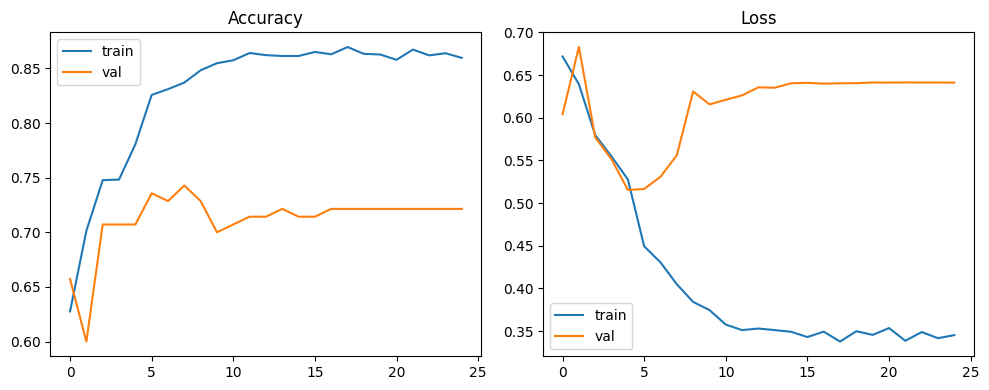

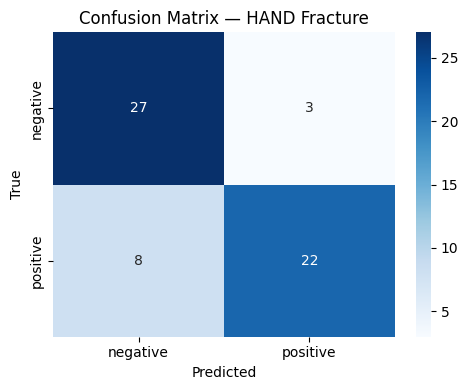


Classification report:

              precision    recall  f1-score   support

    negative       0.77      0.90      0.83        30
    positive       0.88      0.73      0.80        30

    accuracy                           0.82        60
   macro avg       0.83      0.82      0.82        60
weighted avg       0.83      0.82      0.82        60



In [ ]:
import os
import random
from collections import Counter

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


base_root = r"C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman"
category  = "HAND"    
dataset_path = os.path.join(base_root, f"XR_{category}_classification")

image_size   = 224
batch_size   = 16
num_workers  = 2
epochs       = 25
lr           = 1e-4
seed         = 27

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)
print("Dataset path:", dataset_path)


random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)


data_transforms = {
    "train": transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.CenterCrop(image_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    "val": transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.CenterCrop(image_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    "test": transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.CenterCrop(image_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
}

splits = ["train", "val", "test"]

image_datasets = {
    split: datasets.ImageFolder(os.path.join(dataset_path, split),
                                transform=data_transforms[split])
    for split in splits
}

dataloaders = {
    split: DataLoader(image_datasets[split],
                      batch_size=batch_size,
                      shuffle=(split == "train"),
                      num_workers=num_workers)
    for split in splits
}

class_names = image_datasets["train"].classes
print("Klasy:", class_names)
for split in splits:
    print(f"{split:>5}: {len(image_datasets[split])} obrazów")

for split in splits:
    cnt = Counter([label for _, label in image_datasets[split]])
    print(f"{split} distribution:", cnt)
print("───────────────────────────────")


model = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1)


for param in model.features[:20].parameters():   
    param.requires_grad = False



in_features = model.classifier[-1].in_features
model.classifier[-1] = nn.Linear(in_features, len(class_names))
model = model.to(device)


train_labels = [label for _, label in image_datasets["train"]]
counts = Counter(train_labels)
total = sum(counts.values())
class_weights = torch.tensor(
    [total / counts[i] for i in range(len(class_names))],
    dtype=torch.float32
).to(device)
print("Wagi klas:", class_weights.tolist())

criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.AdamW(model.parameters(), lr=lr)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)


history = {
    "train_acc": [], "train_loss": [],
    "val_acc":   [], "val_loss":   [],
    "test_acc":  [], "test_loss":  [],
}

for epoch in range(1, epochs + 1):
    print(f"\nEpoch {epoch}/{epochs}")


    model.train()
    run_loss, correct, total = 0.0, 0, 0
    for inputs, labels in tqdm(dataloaders["train"], desc="Train", leave=False):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        run_loss += loss.item() * inputs.size(0)
        correct += torch.sum(preds == labels).item()
        total += labels.size(0)

    train_loss = run_loss / total
    train_acc = correct / total


    model.eval()
    run_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for inputs, labels in tqdm(dataloaders["val"], desc="Val", leave=False):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            _, preds = torch.max(outputs, 1)
            run_loss += loss.item() * inputs.size(0)
            correct += torch.sum(preds == labels).item()
            total += labels.size(0)

    val_loss = run_loss / total
    val_acc = correct / total


    run_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for inputs, labels in tqdm(dataloaders["test"], desc="Test", leave=False):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            _, preds = torch.max(outputs, 1)
            run_loss += loss.item() * inputs.size(0)
            correct += torch.sum(preds == labels).item()
            total += labels.size(0)

    test_loss = run_loss / total
    test_acc = correct / total

    scheduler.step()

    history["train_acc"].append(train_acc)
    history["train_loss"].append(train_loss)
    history["val_acc"].append(val_acc)
    history["val_loss"].append(val_loss)
    history["test_acc"].append(test_acc)
    history["test_loss"].append(test_loss)

    print(f"Train: acc={train_acc:.3f}, loss={train_loss:.3f} | "
          f"Val: acc={val_acc:.3f}, loss={val_loss:.3f} | "
          f"Test: acc={test_acc:.3f}, loss={test_loss:.3f}")


plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history["train_acc"], label="train")
plt.plot(history["val_acc"], label="val")
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history["train_loss"], label="train")
plt.plot(history["val_loss"], label="val")
plt.title("Loss")
plt.legend()
plt.tight_layout()
plt.show()

y_true, y_pred = [], []
model.eval()
with torch.no_grad():
    for inputs, labels in dataloaders["test"]:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title(f"Confusion Matrix — {category} Fracture")
plt.tight_layout()
plt.show()

print("\nClassification report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))


In [9]:
import os
import random
import shutil
from glob import glob


dataset_path = r"C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman\XR_FINGER_classification"


seed = 42
test_fraction = 0.30       
source_split = "val"       
move_files = True          

random.seed(seed)


splits = ["train", "val", "test"]
classes = ["positive", "negative"]
for split in splits:
    for cls in classes:
        os.makedirs(os.path.join(dataset_path, split, cls), exist_ok=True)

def pick_files(dirpath):
    exts = ("*.jpg", "*.jpeg", "*.png")
    files = []
    for e in exts:
        files.extend(glob(os.path.join(dirpath, e)))
    return files

moved_total = 0
report = []

for cls in classes:
    src_dir = os.path.join(dataset_path, source_split, cls)
    dst_dir = os.path.join(dataset_path, "test", cls)

    files = pick_files(src_dir)
    n_src = len(files)
    if n_src == 0:
        report.append(f"[{cls}] Brak plików w {src_dir} — pomijam.")
        continue

    n_take = max(1, int(round(n_src * test_fraction))) if n_src > 3 else 1
    sample = random.sample(files, n_take)

    for f in sample:
        if move_files:
            shutil.move(f, os.path.join(dst_dir, os.path.basename(f)))
        else:
            shutil.copy2(f, os.path.join(dst_dir, os.path.basename(f)))
    moved_total += len(sample)


    n_src_after = len(pick_files(src_dir))
    n_test_now = len(pick_files(dst_dir))
    report.append(
        f"[{cls}] przeniesiono {len(sample)} z {n_src} → "
        f"{source_split} zostało {n_src_after}, test ma teraz {n_test_now}"
    )


for line in report:
    print(line)
print(f"\nRazem przeniesionych do TEST: {moved_total}")

print("\nŚcieżki:")
print(f"train: {os.path.join(dataset_path, 'train')}")
print(f"val  : {os.path.join(dataset_path, 'val')}")
print(f"test : {os.path.join(dataset_path, 'test')}")



[positive] przeniesiono 30 z 100 → val zostało 70, test ma teraz 30
[negative] przeniesiono 30 z 100 → val zostało 70, test ma teraz 30

Razem przeniesionych do TEST: 60

Ścieżki:
train: C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman\XR_FINGER_classification\train
val  : C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman\XR_FINGER_classification\val
test : C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman\XR_FINGER_classification\test


Device: cuda
Dataset path: C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman\XR_FINGER_classification
Klasy: ['negative', 'positive']
train: 4704 obrazów
  val: 140 obrazów
 test: 60 obrazów
train distribution: Counter({0: 2930, 1: 1774})
val distribution: Counter({0: 70, 1: 70})
test distribution: Counter({0: 30, 1: 30})
───────────────────────────────
Wagi klas: [1.6054607629776, 2.651634693145752]

Epoch 1/25


Train:   0%|          | 0/294 [00:00<?, ?it/s]C:\Users\Weronika\AppData\Local\Temp\ipykernel_15528\344335455.py:142: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\Scalar.cpp:23.)
  run_loss += loss.item() * inputs.size(0)


Train: acc=0.707, loss=0.559 | Val: acc=0.707, loss=0.561 | Test: acc=0.783, loss=0.466

Epoch 2/25


Train: acc=0.773, loss=0.482 | Val: acc=0.743, loss=0.565 | Test: acc=0.733, loss=0.517

Epoch 3/25


Train: acc=0.793, loss=0.448 | Val: acc=0.750, loss=0.532 | Test: acc=0.817, loss=0.446

Epoch 4/25


Train: acc=0.822, loss=0.410 | Val: acc=0.771, loss=0.489 | Test: acc=0.817, loss=0.465

Epoch 5/25


Train: acc=0.839, loss=0.369 | Val: acc=0.764, loss=0.490 | Test: acc=0.817, loss=0.462

Epoch 6/25


Train: acc=0.880, loss=0.291 | Val: acc=0.757, loss=0.516 | Test: acc=0.817, loss=0.518

Epoch 7/25


Train: acc=0.901, loss=0.254 | Val: acc=0.786, loss=0.532 | Test: acc=0.817, loss=0.507

Epoch 8/25


Train: acc=0.908, loss=0.233 | Val: acc=0.800, loss=0.525 | Test: acc=0.850, loss=0.527

Epoch 9/25


Train: acc=0.916, loss=0.207 | Val: acc=0.786, loss=0.539 | Test: acc=0.833, loss=0.557

Epoch 10/25


Train: acc=0.932, loss=0.186 | Val: acc=0.800, loss=0.571 | Test: acc=0.817, loss=0.660

Epoch 11/25


Train: acc=0.939, loss=0.163 | Val: acc=0.800, loss=0.579 | Test: acc=0.833, loss=0.644

Epoch 12/25


Train: acc=0.940, loss=0.159 | Val: acc=0.779, loss=0.587 | Test: acc=0.833, loss=0.643

Epoch 13/25


Train: acc=0.940, loss=0.157 | Val: acc=0.793, loss=0.580 | Test: acc=0.833, loss=0.640

Epoch 14/25


Train: acc=0.943, loss=0.153 | Val: acc=0.786, loss=0.589 | Test: acc=0.833, loss=0.646

Epoch 15/25


Train: acc=0.945, loss=0.145 | Val: acc=0.786, loss=0.599 | Test: acc=0.833, loss=0.659

Epoch 16/25


Train: acc=0.943, loss=0.148 | Val: acc=0.786, loss=0.599 | Test: acc=0.833, loss=0.658

Epoch 17/25


Train: acc=0.942, loss=0.157 | Val: acc=0.786, loss=0.598 | Test: acc=0.833, loss=0.654

Epoch 18/25


Train: acc=0.942, loss=0.151 | Val: acc=0.786, loss=0.598 | Test: acc=0.833, loss=0.652

Epoch 19/25


Train: acc=0.946, loss=0.146 | Val: acc=0.786, loss=0.600 | Test: acc=0.833, loss=0.655

Epoch 20/25


Train: acc=0.948, loss=0.148 | Val: acc=0.786, loss=0.601 | Test: acc=0.833, loss=0.655

Epoch 21/25


Train: acc=0.941, loss=0.154 | Val: acc=0.786, loss=0.601 | Test: acc=0.833, loss=0.655

Epoch 22/25


Train: acc=0.941, loss=0.156 | Val: acc=0.786, loss=0.601 | Test: acc=0.833, loss=0.655

Epoch 23/25


Train: acc=0.944, loss=0.150 | Val: acc=0.786, loss=0.601 | Test: acc=0.833, loss=0.655

Epoch 24/25


Train: acc=0.947, loss=0.146 | Val: acc=0.786, loss=0.601 | Test: acc=0.833, loss=0.655

Epoch 25/25


Train: acc=0.942, loss=0.153 | Val: acc=0.786, loss=0.601 | Test: acc=0.833, loss=0.655


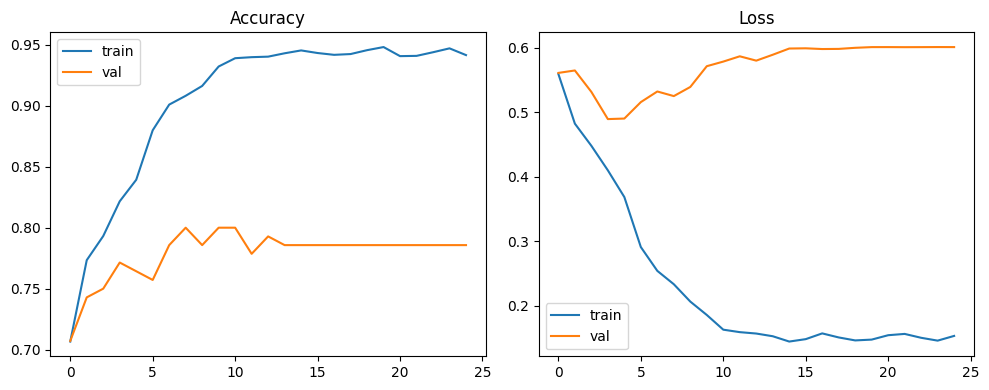

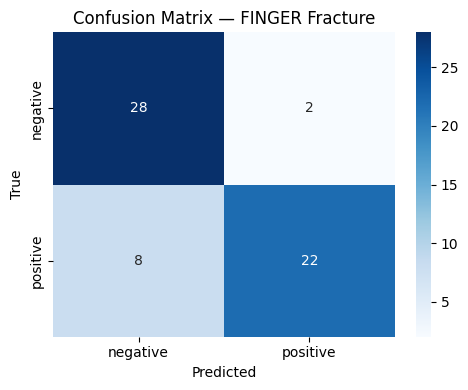


Classification report:

              precision    recall  f1-score   support

    negative       0.78      0.93      0.85        30
    positive       0.92      0.73      0.81        30

    accuracy                           0.83        60
   macro avg       0.85      0.83      0.83        60
weighted avg       0.85      0.83      0.83        60



In [3]:
import os
import random
from collections import Counter

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


base_root = r"C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman"
category  = "FINGER"
dataset_path = os.path.join(base_root, f"XR_{category}_classification")

image_size   = 224
batch_size   = 16
num_workers  = 2
epochs       = 25
lr           = 1e-4
seed         = 27

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)
print("Dataset path:", dataset_path)

random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)


data_transforms = {
    "train": transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.CenterCrop(image_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    "val": transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.CenterCrop(image_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    "test": transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.CenterCrop(image_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
}

splits = ["train", "val", "test"]

image_datasets = {
    split: datasets.ImageFolder(os.path.join(dataset_path, split),
                                transform=data_transforms[split])
    for split in splits
}

dataloaders = {
    split: DataLoader(image_datasets[split],
                      batch_size=batch_size,
                      shuffle=(split == "train"),
                      num_workers=num_workers)
    for split in splits
}

class_names = image_datasets["train"].classes
print("Klasy:", class_names)
for split in splits:
    print(f"{split:>5}: {len(image_datasets[split])} obrazów")


for split in splits:
    cnt = Counter([label for _, label in image_datasets[split]])
    print(f"{split} distribution:", cnt)
print("───────────────────────────────")


model = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1)


for param in model.features[:20].parameters():   
    param.requires_grad = False



in_features = model.classifier[-1].in_features
model.classifier[-1] = nn.Linear(in_features, len(class_names))
model = model.to(device)


train_labels = [label for _, label in image_datasets["train"]]
counts = Counter(train_labels)
total = sum(counts.values())
class_weights = torch.tensor(
    [total / counts[i] for i in range(len(class_names))],
    dtype=torch.float32
).to(device)
print("Wagi klas:", class_weights.tolist())

criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.AdamW(model.parameters(), lr=lr)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)


history = {
    "train_acc": [], "train_loss": [],
    "val_acc":   [], "val_loss":   [],
    "test_acc":  [], "test_loss":  [],
}

for epoch in range(1, epochs + 1):
    print(f"\nEpoch {epoch}/{epochs}")


    model.train()
    run_loss, correct, total = 0.0, 0, 0
    for inputs, labels in tqdm(dataloaders["train"], desc="Train", leave=False):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        run_loss += loss.item() * inputs.size(0)
        correct += torch.sum(preds == labels).item()
        total += labels.size(0)

    train_loss = run_loss / total
    train_acc = correct / total

    model.eval()
    run_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for inputs, labels in tqdm(dataloaders["val"], desc="Val", leave=False):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            _, preds = torch.max(outputs, 1)
            run_loss += loss.item() * inputs.size(0)
            correct += torch.sum(preds == labels).item()
            total += labels.size(0)

    val_loss = run_loss / total
    val_acc = correct / total

    run_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for inputs, labels in tqdm(dataloaders["test"], desc="Test", leave=False):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            _, preds = torch.max(outputs, 1)
            run_loss += loss.item() * inputs.size(0)
            correct += torch.sum(preds == labels).item()
            total += labels.size(0)

    test_loss = run_loss / total
    test_acc = correct / total

    scheduler.step()

    history["train_acc"].append(train_acc)
    history["train_loss"].append(train_loss)
    history["val_acc"].append(val_acc)
    history["val_loss"].append(val_loss)
    history["test_acc"].append(test_acc)
    history["test_loss"].append(test_loss)

    print(f"Train: acc={train_acc:.3f}, loss={train_loss:.3f} | "
          f"Val: acc={val_acc:.3f}, loss={val_loss:.3f} | "
          f"Test: acc={test_acc:.3f}, loss={test_loss:.3f}")

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history["train_acc"], label="train")
plt.plot(history["val_acc"], label="val")
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history["train_loss"], label="train")
plt.plot(history["val_loss"], label="val")
plt.title("Loss")
plt.legend()
plt.tight_layout()
plt.show()


y_true, y_pred = [], []
model.eval()
with torch.no_grad():
    for inputs, labels in dataloaders["test"]:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title(f"Confusion Matrix — {category} Fracture")
plt.tight_layout()
plt.show()

print("\nClassification report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))


In [10]:
import os
import random
import shutil
from glob import glob

dataset_path = r"C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman\XR_FOREARM_classification"


seed = 42
test_fraction = 0.30    
source_split = "val"      
move_files = True          

random.seed(seed)

splits = ["train", "val", "test"]
classes = ["positive", "negative"]
for split in splits:
    for cls in classes:
        os.makedirs(os.path.join(dataset_path, split, cls), exist_ok=True)

def pick_files(dirpath):
    exts = ("*.jpg", "*.jpeg", "*.png")
    files = []
    for e in exts:
        files.extend(glob(os.path.join(dirpath, e)))
    return files

moved_total = 0
report = []

for cls in classes:
    src_dir = os.path.join(dataset_path, source_split, cls)
    dst_dir = os.path.join(dataset_path, "test", cls)

    files = pick_files(src_dir)
    n_src = len(files)
    if n_src == 0:
        report.append(f"[{cls}] Brak plików w {src_dir} — pomijam.")
        continue

    n_take = max(1, int(round(n_src * test_fraction))) if n_src > 3 else 1
    sample = random.sample(files, n_take)

    for f in sample:
        if move_files:
            shutil.move(f, os.path.join(dst_dir, os.path.basename(f)))
        else:
            shutil.copy2(f, os.path.join(dst_dir, os.path.basename(f)))
    moved_total += len(sample)


    n_src_after = len(pick_files(src_dir))
    n_test_now = len(pick_files(dst_dir))
    report.append(
        f"[{cls}] przeniesiono {len(sample)} z {n_src} → "
        f"{source_split} zostało {n_src_after}, test ma teraz {n_test_now}"
    )

for line in report:
    print(line)
print(f"\nRazem przeniesionych do TEST: {moved_total}")

print("\nŚcieżki:")
print(f"train: {os.path.join(dataset_path, 'train')}")
print(f"val  : {os.path.join(dataset_path, 'val')}")
print(f"test : {os.path.join(dataset_path, 'test')}")



[positive] przeniesiono 30 z 100 → val zostało 70, test ma teraz 30
[negative] przeniesiono 30 z 100 → val zostało 70, test ma teraz 30

Razem przeniesionych do TEST: 60

Ścieżki:
train: C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman\XR_FOREARM_classification\train
val  : C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman\XR_FOREARM_classification\val
test : C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman\XR_FOREARM_classification\test


Device: cuda
Dataset path: C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman\XR_FOREARM_classification
Klasy: ['negative', 'positive']
train: 1600 obrazów
  val: 140 obrazów
 test: 60 obrazów
train distribution: Counter({0: 1056, 1: 544})
val distribution: Counter({0: 70, 1: 70})
test distribution: Counter({0: 30, 1: 30})
───────────────────────────────
Wagi klas: [1.5151515007019043, 2.941176414489746]

Epoch 1/25


Train:   0%|          | 0/100 [00:00<?, ?it/s]C:\Users\Weronika\AppData\Local\Temp\ipykernel_7032\448181941.py:143: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\Scalar.cpp:23.)
  run_loss += loss.item() * inputs.size(0)


Train: acc=0.719, loss=0.583 | Val: acc=0.743, loss=0.549 | Test: acc=0.733, loss=0.578

Epoch 2/25


Train: acc=0.819, loss=0.472 | Val: acc=0.821, loss=0.467 | Test: acc=0.800, loss=0.522

Epoch 3/25


Train: acc=0.867, loss=0.392 | Val: acc=0.821, loss=0.484 | Test: acc=0.817, loss=0.486

Epoch 4/25


Train: acc=0.879, loss=0.330 | Val: acc=0.807, loss=0.480 | Test: acc=0.800, loss=0.700

Epoch 5/25


Train: acc=0.886, loss=0.298 | Val: acc=0.779, loss=0.817 | Test: acc=0.817, loss=0.721

Epoch 6/25


Train: acc=0.911, loss=0.229 | Val: acc=0.807, loss=0.655 | Test: acc=0.817, loss=0.664

Epoch 7/25


Train: acc=0.928, loss=0.180 | Val: acc=0.829, loss=0.686 | Test: acc=0.800, loss=0.734

Epoch 8/25


Train: acc=0.939, loss=0.164 | Val: acc=0.829, loss=0.699 | Test: acc=0.783, loss=0.714

Epoch 9/25


Train: acc=0.944, loss=0.149 | Val: acc=0.821, loss=0.834 | Test: acc=0.800, loss=0.779

Epoch 10/25


Train: acc=0.946, loss=0.140 | Val: acc=0.814, loss=0.777 | Test: acc=0.783, loss=0.784

Epoch 11/25


Train: acc=0.961, loss=0.123 | Val: acc=0.814, loss=0.763 | Test: acc=0.767, loss=0.781

Epoch 12/25


Train: acc=0.961, loss=0.118 | Val: acc=0.821, loss=0.795 | Test: acc=0.783, loss=0.801

Epoch 13/25


Train: acc=0.954, loss=0.121 | Val: acc=0.821, loss=0.792 | Test: acc=0.783, loss=0.805

Epoch 14/25


Train: acc=0.968, loss=0.099 | Val: acc=0.814, loss=0.823 | Test: acc=0.783, loss=0.823

Epoch 15/25


Train: acc=0.963, loss=0.109 | Val: acc=0.821, loss=0.856 | Test: acc=0.783, loss=0.844

Epoch 16/25


Train: acc=0.960, loss=0.114 | Val: acc=0.821, loss=0.858 | Test: acc=0.783, loss=0.845

Epoch 17/25


Train: acc=0.966, loss=0.110 | Val: acc=0.821, loss=0.856 | Test: acc=0.783, loss=0.845

Epoch 18/25


Train: acc=0.958, loss=0.101 | Val: acc=0.821, loss=0.858 | Test: acc=0.783, loss=0.846

Epoch 19/25


Train: acc=0.963, loss=0.105 | Val: acc=0.821, loss=0.858 | Test: acc=0.783, loss=0.846

Epoch 20/25


Train: acc=0.964, loss=0.110 | Val: acc=0.821, loss=0.855 | Test: acc=0.783, loss=0.846

Epoch 21/25


Train: acc=0.971, loss=0.100 | Val: acc=0.821, loss=0.855 | Test: acc=0.783, loss=0.846

Epoch 22/25


Train: acc=0.964, loss=0.117 | Val: acc=0.821, loss=0.855 | Test: acc=0.783, loss=0.846

Epoch 23/25


Train: acc=0.963, loss=0.112 | Val: acc=0.821, loss=0.855 | Test: acc=0.783, loss=0.846

Epoch 24/25


Train: acc=0.959, loss=0.113 | Val: acc=0.821, loss=0.854 | Test: acc=0.783, loss=0.846

Epoch 25/25


Train: acc=0.964, loss=0.113 | Val: acc=0.821, loss=0.855 | Test: acc=0.783, loss=0.846


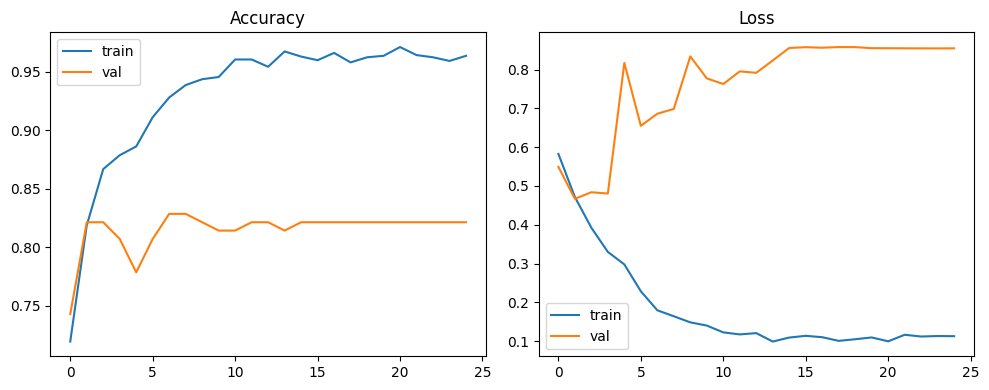

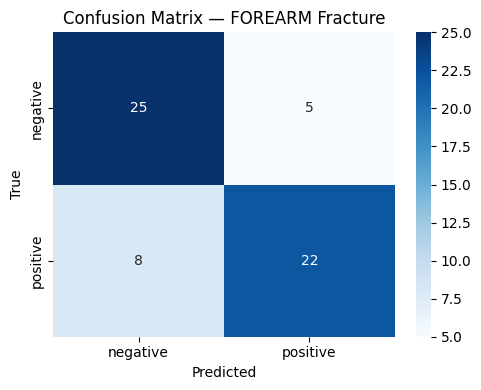


Classification report:

              precision    recall  f1-score   support

    negative       0.76      0.83      0.79        30
    positive       0.81      0.73      0.77        30

    accuracy                           0.78        60
   macro avg       0.79      0.78      0.78        60
weighted avg       0.79      0.78      0.78        60



In [2]:
import os
import random
from collections import Counter

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


base_root = r"C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman"
category  = "FOREARM" 
dataset_path = os.path.join(base_root, f"XR_{category}_classification")

image_size   = 224
batch_size   = 16
num_workers  = 2
epochs       = 25
lr           = 1e-4
seed         = 27

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)
print("Dataset path:", dataset_path)


random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)

data_transforms = {
    "train": transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.CenterCrop(image_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    "val": transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.CenterCrop(image_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    "test": transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.CenterCrop(image_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
}


splits = ["train", "val", "test"]

image_datasets = {
    split: datasets.ImageFolder(os.path.join(dataset_path, split),
                                transform=data_transforms[split])
    for split in splits
}

dataloaders = {
    split: DataLoader(image_datasets[split],
                      batch_size=batch_size,
                      shuffle=(split == "train"),
                      num_workers=num_workers)
    for split in splits
}

class_names = image_datasets["train"].classes
print("Klasy:", class_names)
for split in splits:
    print(f"{split:>5}: {len(image_datasets[split])} obrazów")


for split in splits:
    cnt = Counter([label for _, label in image_datasets[split]])
    print(f"{split} distribution:", cnt)
print("───────────────────────────────")


model = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1)


for param in model.features[:20].parameters():   
    param.requires_grad = False



in_features = model.classifier[-1].in_features
model.classifier[-1] = nn.Linear(in_features, len(class_names))
model = model.to(device)


train_labels = [label for _, label in image_datasets["train"]]
counts = Counter(train_labels)
total = sum(counts.values())
class_weights = torch.tensor(
    [total / counts[i] for i in range(len(class_names))],
    dtype=torch.float32
).to(device)
print("Wagi klas:", class_weights.tolist())

criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.AdamW(model.parameters(), lr=lr)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)


history = {
    "train_acc": [], "train_loss": [],
    "val_acc":   [], "val_loss":   [],
    "test_acc":  [], "test_loss":  [],
}

for epoch in range(1, epochs + 1):
    print(f"\nEpoch {epoch}/{epochs}")

    
    model.train()
    run_loss, correct, total = 0.0, 0, 0
    for inputs, labels in tqdm(dataloaders["train"], desc="Train", leave=False):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        run_loss += loss.item() * inputs.size(0)
        correct += torch.sum(preds == labels).item()
        total += labels.size(0)

    train_loss = run_loss / total
    train_acc = correct / total

    
    model.eval()
    run_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for inputs, labels in tqdm(dataloaders["val"], desc="Val", leave=False):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            _, preds = torch.max(outputs, 1)
            run_loss += loss.item() * inputs.size(0)
            correct += torch.sum(preds == labels).item()
            total += labels.size(0)

    val_loss = run_loss / total
    val_acc = correct / total


    run_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for inputs, labels in tqdm(dataloaders["test"], desc="Test", leave=False):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            _, preds = torch.max(outputs, 1)
            run_loss += loss.item() * inputs.size(0)
            correct += torch.sum(preds == labels).item()
            total += labels.size(0)

    test_loss = run_loss / total
    test_acc = correct / total

    scheduler.step()

    history["train_acc"].append(train_acc)
    history["train_loss"].append(train_loss)
    history["val_acc"].append(val_acc)
    history["val_loss"].append(val_loss)
    history["test_acc"].append(test_acc)
    history["test_loss"].append(test_loss)

    print(f"Train: acc={train_acc:.3f}, loss={train_loss:.3f} | "
          f"Val: acc={val_acc:.3f}, loss={val_loss:.3f} | "
          f"Test: acc={test_acc:.3f}, loss={test_loss:.3f}")


plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history["train_acc"], label="train")
plt.plot(history["val_acc"], label="val")
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history["train_loss"], label="train")
plt.plot(history["val_loss"], label="val")
plt.title("Loss")
plt.legend()
plt.tight_layout()
plt.show()


y_true, y_pred = [], []
model.eval()
with torch.no_grad():
    for inputs, labels in dataloaders["test"]:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title(f"Confusion Matrix — {category} Fracture")
plt.tight_layout()
plt.show()

print("\nClassification report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))
